# Visualizing And Analysing The Data

### Importing Necessary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Loading Dataset

In [2]:
df=pd.read_csv(r'C:\Users\lenovo\Intenship Project\Dataset.csv')

### Reading dataset

In [3]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
0,29,F,f,f,f,f,f,f,f,t,...,NaN,f,NaN,f,NaN,f,NaN,other,-,840801013
1,29,F,f,f,f,f,f,f,f,f,...,128.0,f,NaN,f,NaN,f,NaN,other,-,840801014
2,41,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,11.0,other,-,840801042
3,36,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,26.0,other,-,840803046
4,32,F,f,f,f,f,f,f,f,f,...,NaN,f,NaN,f,NaN,t,36.0,other,S,840803047


In [4]:
df.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,target,patient_id
9167,56,M,f,f,f,f,f,f,f,f,...,64.0,t,0.83,t,77.0,f,NaN,SVI,-,870119022
9168,22,M,f,f,f,f,f,f,f,f,...,91.0,t,0.92,t,99.0,f,NaN,SVI,-,870119023
9169,69,M,f,f,f,f,f,f,f,f,...,113.0,t,1.27,t,89.0,f,NaN,SVI,I,870119025
9170,47,F,f,f,f,f,f,f,f,f,...,75.0,t,0.85,t,88.0,f,NaN,other,-,870119027
9171,31,M,f,f,f,f,f,f,f,t,...,66.0,t,1.02,t,65.0,f,NaN,other,-,870119035


In [5]:
df.shape

(9172, 31)

In [6]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH_measured', 'TSH',
       'T3_measured', 'T3', 'TT4_measured', 'TT4', 'T4U_measured', 'T4U',
       'FTI_measured', 'FTI', 'TBG_measured', 'TBG', 'referral_source',
       'target', 'patient_id'],
      dtype='object')

# Data Preprocessing

### Checking for Null Values

In [7]:
df.isnull().sum()

age                       0
sex                     308
on_thyroxine              5
query_on_thyroxine        2
on_antithyroid_meds       4
sick                      0
pregnant                  1
thyroid_surgery           0
I131_treatment            6
query_hypothyroid         1
query_hyperthyroid        2
lithium                   3
goitre                    2
tumor                     3
hypopituitary             2
psych                     1
TSH_measured              1
TSH                     842
T3_measured               0
T3                     2604
TT4_measured              2
TT4                     442
T4U_measured              4
T4U                     809
FTI_measured              0
FTI                     802
TBG_measured              3
TBG                    8823
referral_source           2
target                    1
patient_id                0
dtype: int64

#### Removing the Reduntant attributes from dataset.

In [8]:
df = df.drop(['patient_id','referral_source','TBG_measured','FTI_measured','TT4_measured','T4U_measured','TSH_measured','T3_measured'],axis=1) 

#### Re-mapping the 'target' values to diagnostic Group

In [9]:
df['target'].unique()

array(['-', 'S', 'F', 'AK', 'R', 'I', 'M', 'N', 'G', 'K', 'A', 'KJ', 'L',
       'MK', 'Q', 'J', 'C|I', 'O', 'LJ', 'H|K', 'D', 'GK', 'MI', 'P',
       'FK', 'B', 'GI', 'C', nan, 'GKJ', 'OI', 'D|R', 'E'], dtype=object)

In [10]:
diagnoses = {
             'A': 'hyperthyroid', 
             'B': 'hyperthyroid', 
             'C': 'hyperthyroid', 
             'D': 'hyperthyroid',
             'E': 'hypothyroid', 
             'F': 'hypothyroid', 
             'G': 'hypothyroid', 
             'H': 'hypothyroid',
             'I':'binding protein',
             'J':'binding protein',
             'K': 'general health', 
             'L': 'replacement therapy', 
             'M': 'replacement therapy',
             'N': 'replacement therapy', 
             'O': 'antithyroid treatment', 
             'P': 'antithyroid treatment',
             'Q': 'antithyroid treatment', 
             'R': 'miscellaneous', 
             'S': 'miscellaneous',
             'T': 'miscellaneous'}

df['target'] = df['target'].map(diagnoses)


In [11]:
df.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
0,29,F,f,f,f,f,f,f,f,t,...,f,f,f,0.3,NaN,NaN,NaN,NaN,NaN,NaN
1,29,F,f,f,f,f,f,f,f,f,...,f,f,f,1.6,1.9,128.0,NaN,NaN,NaN,NaN
2,41,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,11.0,NaN
3,36,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,26.0,NaN
4,32,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous


In [12]:
df.tail()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
9167,56,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,64.0,0.83,77.0,NaN,NaN
9168,22,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,91.0,0.92,99.0,NaN,NaN
9169,69,M,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,113.0,1.27,89.0,NaN,binding protein
9170,47,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,75.0,0.85,88.0,NaN,NaN
9171,31,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,66.0,1.02,65.0,NaN,NaN


#### Dropping the 'target'  of nan values

In [13]:
df.dropna(subset=['target'], inplace=True)

In [14]:
df['target'].value_counts()

hypothyroid              593
general health           436
binding protein          376
replacement therapy      336
miscellaneous            281
hyperthyroid             182
antithyroid treatment     33
Name: target, dtype: int64

### Descriptive Analysis

In [15]:
df.describe()

,age,TSH,T3,TT4,T4U,FTI,TBG
count,2237.000000,2087.000000,1643.000000,2140.000000,2059.000000,2060.000000,98.000000
mean,52.792579,14.930791,1.961875,116.390495,1.013439,120.363369,47.717347
std,19.677450,46.204092,1.452238,60.351600,0.280222,70.996728,32.398750
min,1.000000,0.005000,0.050000,2.000000,0.170000,1.400000,9.299999
25%,36.000000,0.255000,1.000000,76.000000,0.850000,83.000000,32.000000
50%,56.000000,2.000000,1.700000,109.000000,0.960000,109.000000,36.000000
75%,69.000000,8.799999,2.500000,156.000000,1.120000,157.000000,46.750000
max,95.000000,530.000000,18.000000,600.000000,2.330000,881.000000,200.000000


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   int64  
 1   sex                  2147 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2236 non-null   object 
 4   on_antithyroid_meds  2236 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2236 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2235 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2236 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2236 non-null   object 
 15  psych                2237 non-null   o

In [17]:
# Checking the 'age' is there any above 100 and we dropping the age>100.
df[df.age>100]

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target


In [18]:
df['age']=np.where((df.age>100),np.nan,df.age)

In [19]:
df

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG,target
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,NaN,NaN,NaN,36.0,miscellaneous
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,68.000000,NaN,48.0,1.02,47.0,NaN,hypothyroid
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.050000,1.6,39.0,1.00,39.0,NaN,miscellaneous
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,0.050000,NaN,126.0,1.38,91.0,NaN,binding protein
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,9.599999,2.4,136.0,1.48,92.0,NaN,replacement therapy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,0.810000,NaN,31.0,0.55,56.0,NaN,general health
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,0.180000,NaN,28.0,0.87,32.0,NaN,general health
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,NaN,NaN,44.0,0.53,83.0,NaN,binding protein
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,NaN,NaN,84.0,1.26,67.0,NaN,binding protein


### Splitting The Data X And Y

In [20]:
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [21]:
x.columns


Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG'],
      dtype='object')

#### Making 'F' on where ever we have the 'nan' values on data

In [22]:
x['sex'].unique()

array(['F', 'M', nan], dtype=object)

In [23]:
x['sex'].replace(np.nan,'F',inplace=True)

### Converting The Datatype

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2237 non-null   object 
 2   on_thyroxine         2237 non-null   object 
 3   query_on_thyroxine   2236 non-null   object 
 4   on_antithyroid_meds  2236 non-null   object 
 5   sick                 2237 non-null   object 
 6   pregnant             2236 non-null   object 
 7   thyroid_surgery      2237 non-null   object 
 8   I131_treatment       2235 non-null   object 
 9   query_hypothyroid    2237 non-null   object 
 10  query_hyperthyroid   2237 non-null   object 
 11  lithium              2237 non-null   object 
 12  goitre               2236 non-null   object 
 13  tumor                2237 non-null   object 
 14  hypopituitary        2236 non-null   object 
 15  psych                2237 non-null   o

#### Replacing the nan values with zero (0) values.

In [25]:
x.replace(np.nan,'0',inplace=True)

In [26]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0,0,0,0,0,36.0
18,63.0,F,t,f,f,t,f,f,f,f,...,f,f,f,f,68.0,0,48.0,1.02,47.0,0
32,41.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.05,1.6,39.0,1.0,39.0,0
33,71.0,F,t,f,f,f,f,f,f,f,...,f,f,f,f,0.05,0,126.0,1.38,91.0,0
39,55.0,F,t,f,f,f,f,f,f,t,...,f,f,f,f,9.599999,2.4,136.0,1.48,92.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,M,f,f,f,f,f,f,f,f,...,f,f,f,f,0.81,0,31.0,0.55,56.0,0
9157,60.0,M,f,f,t,f,f,f,f,f,...,f,f,f,f,0.18,0,28.0,0.87,32.0,0
9158,64.0,M,f,f,f,f,f,f,f,t,...,f,f,f,f,0,0,44.0,0.53,83.0,0
9162,36.0,F,f,f,f,f,f,f,f,f,...,f,f,f,f,0,0,84.0,1.26,67.0,0


In [27]:
x.isnull().sum()

age                    0
sex                    0
on_thyroxine           0
query_on_thyroxine     0
on_antithyroid_meds    0
sick                   0
pregnant               0
thyroid_surgery        0
I131_treatment         0
query_hypothyroid      0
query_hyperthyroid     0
lithium                0
goitre                 0
tumor                  0
hypopituitary          0
psych                  0
TSH                    0
T3                     0
TT4                    0
T4U                    0
FTI                    0
TBG                    0
dtype: int64

###  Handling Categorical Values

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
categorical_cols = ['sex', 'on_thyroxine', 'query_on_thyroxine', 'on_antithyroid_meds', 'sick', 'pregnant',
                    'thyroid_surgery', 'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
                    'goitre', 'tumor', 'hypopituitary', 'psych']

In [30]:
label_encoder = LabelEncoder()
for col in categorical_cols:
    x[col] = label_encoder.fit_transform(x[col])

In [31]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 4 to 9169
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  2237 non-null   float64
 1   sex                  2237 non-null   int32  
 2   on_thyroxine         2237 non-null   int32  
 3   query_on_thyroxine   2237 non-null   int32  
 4   on_antithyroid_meds  2237 non-null   int32  
 5   sick                 2237 non-null   int32  
 6   pregnant             2237 non-null   int32  
 7   thyroid_surgery      2237 non-null   int32  
 8   I131_treatment       2237 non-null   int32  
 9   query_hypothyroid    2237 non-null   int32  
 10  query_hyperthyroid   2237 non-null   int32  
 11  lithium              2237 non-null   int32  
 12  goitre               2237 non-null   int32  
 13  tumor                2237 non-null   int32  
 14  hypopituitary        2237 non-null   int32  
 15  psych                2237 non-null   i

In [32]:
x

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
4,32.0,0,0,1,1,0,1,0,1,0,...,1,0,1,0,0,0,0,0,0,36.0
18,63.0,0,1,1,1,1,1,0,1,0,...,1,0,1,0,68.0,0,48.0,1.02,47.0,0
32,41.0,1,0,1,1,0,1,0,1,0,...,1,0,1,0,0.05,1.6,39.0,1.0,39.0,0
33,71.0,0,1,1,1,0,1,0,1,0,...,1,0,1,0,0.05,0,126.0,1.38,91.0,0
39,55.0,0,1,1,1,0,1,0,1,1,...,1,0,1,0,9.599999,2.4,136.0,1.48,92.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9153,64.0,1,0,1,1,0,1,0,1,0,...,1,0,1,0,0.81,0,31.0,0.55,56.0,0
9157,60.0,1,0,1,2,0,1,0,1,0,...,1,0,1,0,0.18,0,28.0,0.87,32.0,0
9158,64.0,1,0,1,1,0,1,0,1,1,...,1,0,1,0,0,0,44.0,0.53,83.0,0
9162,36.0,0,0,1,1,0,1,0,1,0,...,1,0,1,0,0,0,84.0,1.26,67.0,0


#### Now, applying Label Encoding on y(Independent variable) value.

In [33]:
label_encoder_y = LabelEncoder()
y = label_encoder_y.fit_transform(y)

In [34]:
y=pd.DataFrame(y,columns=['target'])

In [35]:
y

,target
0,5
1,4
2,5
3,1
4,6
...,...
2232,2
2233,2
2234,1
2235,1


In [36]:
y['target'].unique()

array([5, 4, 1, 6, 2, 3, 0])

In [37]:
label_encoder_y.inverse_transform([6])

array(['replacement therapy'], dtype=object)

### Checking Correlation

<Axes: >

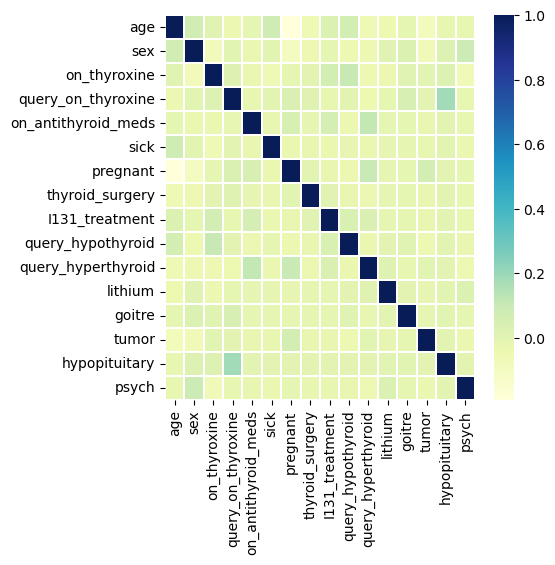

In [38]:
c=x.corr()
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(c,ax=ax,cmap="YlGnBu",linewidths=0.1)

##  Handling Imbalanced Data

In [39]:
from imblearn.over_sampling import SMOTE

In [40]:
hid=SMOTE(random_state=0,k_neighbors=1)
x_bal,y_bal=hid.fit_resample(x,y)

### Applying StandardScaler

In [41]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_bal=sc.fit_transform(x_bal)

### Splitting Data Into Train And Test

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_bal,y_bal,test_size=0.20,random_state=0)

In [43]:
y_train.value_counts()

target
0         489
2         478
5         475
1         474
4         473
3         470
6         461
dtype: int64

In [44]:
x_train

array([[-1.0524399 , -0.4363732 ,  2.33573897, ...,  1.8728954 ,
         0.20949854, -0.17894415],
       [-0.22463195, -0.4363732 , -0.42813003, ...,  0.78834482,
        -0.15685004, -0.17894415],
       [ 1.53445994,  2.29161647, -0.42813003, ..., -0.13352318,
         0.05074749, -0.17894415],
       ...,
       [ 0.81012798, -0.4363732 , -0.42813003, ...,  0.32741082,
         0.75902142, -0.17894415],
       [ 0.42614661, -0.4363732 , -0.42813003, ..., -0.26909201,
        -0.45785737, -0.17894415],
       [ 0.24645416, -0.4363732 , -0.42813003, ...,  0.28269346,
        -0.89297379, -0.17894415]])

In [45]:
columns=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG']

In [46]:
x_test=pd.DataFrame(x_test,columns=columns)

In [47]:
x_train=pd.DataFrame(x_train,columns=columns)

In [48]:
x_train

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_meds,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-1.052440,-0.436373,2.335739,-0.096241,-0.196965,-0.135648,6.958250,-0.224398,-0.148162,-0.229677,...,-0.011294,-0.134724,0.0,-0.107015,-0.295856,0.769486,1.526553,1.872895,0.209499,-0.178944
1,-0.224632,-0.436373,-0.428130,-0.096241,-0.196965,-0.135648,-0.140225,-0.224398,-0.148162,-0.229677,...,-0.011294,-0.134724,0.0,-0.107015,-0.275751,1.081141,0.179159,0.788345,-0.156850,-0.178944
2,1.534460,2.291616,-0.428130,-0.096241,-0.196965,-0.135648,-0.140225,-0.224398,-0.148162,-0.229677,...,-0.011294,-0.134724,0.0,-0.107015,-0.267134,-0.539465,-0.131778,-0.133523,0.050747,-0.178944
3,1.534460,-0.436373,-0.428130,-0.096241,-0.196965,-0.135648,-0.140225,-0.224398,-0.148162,4.353933,...,-0.011294,-0.134724,0.0,-0.107015,-0.155121,-0.352472,-0.250230,-0.160637,-0.046945,-0.178944
4,-1.052440,-0.436373,-0.428130,-0.096241,-0.196965,-0.135648,-0.140225,-0.224398,-0.148162,-0.229677,...,-0.011294,-0.134724,0.0,-0.107015,-0.063213,0.270838,-0.339070,0.625662,-0.449929,-0.178944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3315,0.861866,-0.436373,-0.428130,-0.096241,-0.196965,-0.135648,-0.140225,-0.224398,-0.148162,-0.229677,...,-0.011294,-0.134724,0.0,-0.107015,1.157440,-0.788789,-1.508786,0.896800,-1.292531,-0.178944
3316,-1.442936,-0.436373,-0.428130,-0.096241,-0.196965,-0.135648,-0.140225,-0.224398,-0.148162,-0.229677,...,-0.011294,-0.134724,0.0,-0.107015,-0.302904,0.973441,0.720252,0.006934,0.707973,-0.178944
3317,0.810128,-0.436373,-0.428130,-0.096241,-0.196965,-0.135648,-0.140225,-0.224398,-0.148162,-0.229677,...,-0.011294,-0.134724,0.0,-0.107015,-0.270006,-1.038113,1.082357,0.327411,0.759021,-0.178944
3318,0.426147,-0.436373,-0.428130,-0.096241,-0.196965,-0.135648,-0.140225,-0.224398,6.464948,-0.229677,...,-0.011294,-0.134724,0.0,-0.107015,-0.287823,-0.363403,-0.718846,-0.269092,-0.457857,-0.178944


# Model Building

### Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report
rfm = RandomForestClassifier().fit(x_train, y_train)
y_pred_rfm = rfm.predict(x_test)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rfm))
print("Accuracy:", accuracy_score(y_test, y_pred_rfm))

Random Forest Classifier:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       104
           1       1.00      0.98      0.99       119
           2       0.98      0.99      0.99       115
           3       0.96      0.98      0.97       123
           4       0.98      0.97      0.98       120
           5       0.98      0.96      0.97       118
           6       1.00      0.98      0.99       132

    accuracy                           0.98       831
   macro avg       0.98      0.98      0.98       831
weighted avg       0.98      0.98      0.98       831

Accuracy: 0.9819494584837545


# Performing Feature Importance

In [50]:
from sklearn.inspection import permutation_importance
res=permutation_importance(rfm,x_train,y_train,scoring='accuracy')

In [51]:
fi=['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG']
importance=res.importances_mean
importance=np.sort(importance)
for i,v in enumerate(importance):
    i=fi[i]
    print("feature: {:<20} score:{}".format(i,v))

feature: age                  score:0.0
feature: sex                  score:0.0
feature: on_thyroxine         score:0.0
feature: query_on_thyroxine   score:0.000120481927710836
feature: on_antithyroid_meds  score:0.000240963855421672
feature: sick                 score:0.000240963855421672
feature: pregnant             score:0.00030120481927709
feature: thyroid_surgery      score:0.00030120481927709
feature: I131_treatment       score:0.00030120481927709
feature: query_hypothyroid    score:0.00060240963855418
feature: query_hyperthyroid   score:0.0012048192771084265
feature: lithium              score:0.0018072289156626509
feature: goitre               score:0.008192771084337335
feature: tumor                score:0.009096385542168673
feature: hypopituitary        score:0.015240963855421685
feature: psych                score:0.04885542168674699
feature: TSH                  score:0.05325301204819275
feature: T3                   score:0.06518072289156625
feature: TT4                  

# Selecting Output Columns

In [52]:
df.columns

Index(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium',
       'goitre', 'tumor', 'hypopituitary', 'psych', 'TSH', 'T3', 'TT4', 'T4U',
       'FTI', 'TBG', 'target'],
      dtype='object')

In [53]:
x_train=x_train.drop(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium'],axis=1)

In [54]:
x_train


,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.011294,-0.134724,0.0,-0.107015,-0.295856,0.769486,1.526553,1.872895,0.209499,-0.178944
1,-0.011294,-0.134724,0.0,-0.107015,-0.275751,1.081141,0.179159,0.788345,-0.156850,-0.178944
2,-0.011294,-0.134724,0.0,-0.107015,-0.267134,-0.539465,-0.131778,-0.133523,0.050747,-0.178944
3,-0.011294,-0.134724,0.0,-0.107015,-0.155121,-0.352472,-0.250230,-0.160637,-0.046945,-0.178944
4,-0.011294,-0.134724,0.0,-0.107015,-0.063213,0.270838,-0.339070,0.625662,-0.449929,-0.178944
...,...,...,...,...,...,...,...,...,...,...
3315,-0.011294,-0.134724,0.0,-0.107015,1.157440,-0.788789,-1.508786,0.896800,-1.292531,-0.178944
3316,-0.011294,-0.134724,0.0,-0.107015,-0.302904,0.973441,0.720252,0.006934,0.707973,-0.178944
3317,-0.011294,-0.134724,0.0,-0.107015,-0.270006,-1.038113,1.082357,0.327411,0.759021,-0.178944
3318,-0.011294,-0.134724,0.0,-0.107015,-0.287823,-0.363403,-0.718846,-0.269092,-0.457857,-0.178944


In [55]:
x_test=x_test.drop(['age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_meds', 'sick', 'pregnant', 'thyroid_surgery',
       'I131_treatment', 'query_hypothyroid', 'query_hyperthyroid', 'lithium'],axis=1)

In [56]:
x_test

,goitre,tumor,hypopituitary,psych,TSH,T3,TT4,T4U,FTI,TBG
0,-0.011294,-0.134724,0.0,-0.107015,-0.305242,-0.763711,0.723570,-0.335884,1.060589,-0.178944
1,-0.011294,-0.134724,0.0,-0.107015,0.106763,-0.026377,-1.160289,0.221608,-0.987240,-0.178944
2,-0.011294,-0.134724,0.0,-0.107015,-0.092451,-0.126018,-1.034977,0.316097,-0.901144,-0.178944
3,-0.011294,-0.134724,0.0,-0.107015,-0.303579,2.612548,2.058793,0.050413,1.843216,-0.178944
4,-0.011294,-0.134724,0.0,-0.107015,-0.306205,8.059977,4.465896,-0.467293,5.337492,-0.178944
...,...,...,...,...,...,...,...,...,...,...
826,-0.011294,-0.134724,0.0,-0.107015,-0.305006,0.439000,1.353348,0.302181,0.990194,-0.178944
827,-0.011294,-0.134724,0.0,-0.107015,0.296760,0.325977,-1.110718,0.551968,-0.997182,-0.178944
828,-0.011294,-0.134724,0.0,-0.107015,2.966879,-0.851120,-1.331107,-0.865595,-0.938394,-0.178944
829,-0.011294,-0.134724,0.0,-0.107015,0.259962,0.233833,-1.132606,0.418360,-0.994173,-0.178944


# Model Building On Selected Columns

### Random Forest Classifier Model

In [57]:
rfm= RandomForestClassifier().fit(x_train,y_train)
y_pred=rfm.predict(x_test)
print(classification_report(y_test,y_pred_rfm))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       104
           1       1.00      0.98      0.99       119
           2       0.98      0.99      0.99       115
           3       0.96      0.98      0.97       123
           4       0.98      0.97      0.98       120
           5       0.98      0.96      0.97       118
           6       1.00      0.98      0.99       132

    accuracy                           0.98       831
   macro avg       0.98      0.98      0.98       831
weighted avg       0.98      0.98      0.98       831



### XGBClassifier Model

In [58]:
import xgboost as xgb
xgb1 = xgb.XGBClassifier()
xgb1.fit(x_train, y_train)
y_pred_xgb = xgb1.predict(x_test)
print("XGBoost Classifier:")
print(classification_report(y_test, y_pred_xgb))
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))

XGBoost Classifier:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       104
           1       0.97      0.94      0.95       119
           2       0.96      0.97      0.96       115
           3       0.92      0.95      0.94       123
           4       0.80      0.89      0.85       120
           5       0.88      0.89      0.88       118
           6       0.80      0.68      0.74       132

    accuracy                           0.89       831
   macro avg       0.89      0.90      0.89       831
weighted avg       0.89      0.89      0.89       831

Accuracy: 0.8916967509025271


### SVC Model

In [59]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
y_pred_svc = svc.predict(x_test)
print("SVC Classifier:")
print(classification_report(y_test, y_pred_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_svc))

SVC Classifier:
              precision    recall  f1-score   support

           0       0.68      0.81      0.74       104
           1       0.82      0.83      0.83       119
           2       0.78      0.93      0.85       115
           3       0.83      0.73      0.78       123
           4       0.68      0.60      0.64       120
           5       0.75      0.72      0.74       118
           6       0.59      0.55      0.56       132

    accuracy                           0.73       831
   macro avg       0.73      0.74      0.73       831
weighted avg       0.73      0.73      0.73       831

Accuracy: 0.7328519855595668


### GridSearch CV

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
params = {'C': [0.1, 1, 10, 100, 1000],
          'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
          'kernel': ['rbf', 'sqrt']}

In [62]:
grid_search_svc = GridSearchCV(svc, params, scoring='accuracy', cv=5, n_jobs=-1)
grid_search_svc.fit(x_train, y_train)
best_params = grid_search_svc.best_params_
print("Best Parameters for SVC:", best_params)

Best Parameters for SVC: {'C': 1000, 'gamma': 1, 'kernel': 'rbf'}


In [63]:
best_svc = SVC(C=best_params['C'], gamma=best_params['gamma'], kernel=best_params['kernel'])
best_svc.fit(x_train, y_train)
y_pred_best_svc = best_svc.predict(x_test)
print("SVC Classifier with Best Parameters:")
print(classification_report(y_test, y_pred_best_svc))
print("Accuracy:", accuracy_score(y_test, y_pred_best_svc))

SVC Classifier with Best Parameters:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       104
           1       0.85      0.91      0.88       119
           2       0.92      0.97      0.95       115
           3       0.90      0.83      0.86       123
           4       0.81      0.83      0.82       120
           5       0.84      0.86      0.85       118
           6       0.73      0.64      0.69       132

    accuracy                           0.86       831
   macro avg       0.86      0.86      0.86       831
weighted avg       0.85      0.86      0.85       831

Accuracy: 0.855595667870036


In [67]:
import pickle
pickle.dump(rfm,open('thyroid1_model.pkl','wb'))

In [68]:
pickle.dump(label_encoder,open('label_encoder.pkl','wb'))

In [69]:
pickle.dump(label_encoder_y,open('label_encoder_y.pkl','wb'))